<a href="https://colab.research.google.com/github/VivekDubey18/House_Price_Prediction/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()   #to upload zip file from own laptop

Saving Housing.csv to Housing.csv


In [2]:
import numpy as np                                         # helps work with arrays and math operations easily
import matplotlib.pyplot as plt                            #used to draw graphs and plots
from sklearn.preprocessing import StandardScaler           #scales data to have mean 0 and std 1
from sklearn.linear_model import SGDRegressor              #linear regression using stochastic gradient descent
from sklearn.metrics import r2_score, mean_squared_error   #r2_score, MSE: check how good the model is

In [3]:
import pandas as pd

# Load dataset into 'data'
data = pd.read_csv("Housing.csv")    # Load the CSV file "Housing.csv" into a table called 'data'

In [4]:
# Select features
X = data.iloc[:, 1].values.reshape(-1, 1)   # Pick 'Area' column as input feature
y = data.iloc[:, 0].values                  # Pick 'Price' column as target/output


# Normalize Area
scaler_X = StandardScaler()                 # Create a scaler for X to standardize values
X_scaled = scaler_X.fit_transform(X)       # Scale Area so average=0 and spread=1

scaler_y = StandardScaler()                 # Create a scaler for y (Price)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1)).ravel()  # Scale Price too

# SGD Regressor (gradient descent)
sgd = SGDRegressor(loss="squared_error", learning_rate="constant", eta0=0.001,
                   max_iter=1, warm_start=True, random_state=42)                            # Set up model: linear regression using tiny steps of gradient descent

epochs = 10                                # Repeat training 10 times
r2_scores = []                              # To store R² score after each epoch
mse_losses = []                             # To store error after each epoch


for epoch in range(epochs):
    sgd.fit(X_scaled, y_scaled)            # Train model on scaled data
    y_pred_scaled = sgd.predict(X_scaled)  # Predict scaled prices
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))  # Convert back to original scale

    r2_scores.append(r2_score(y, y_pred))             # Measure how good the model is
    mse_losses.append(mean_squared_error(y, y_pred)) # Measure prediction error


print("Final Coefficient:", sgd.coef_[0])   # Show slope of the line
print("Final Intercept:", sgd.intercept_[0]) # Show starting point of the line
print("Final R² Score:", r2_scores[-1])     # Show how well final model fits the data



Final Coefficient: 0.5310216861107477
Final Intercept: 0.008719613671677682
Final R² Score: 0.2871923658294384


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stocha

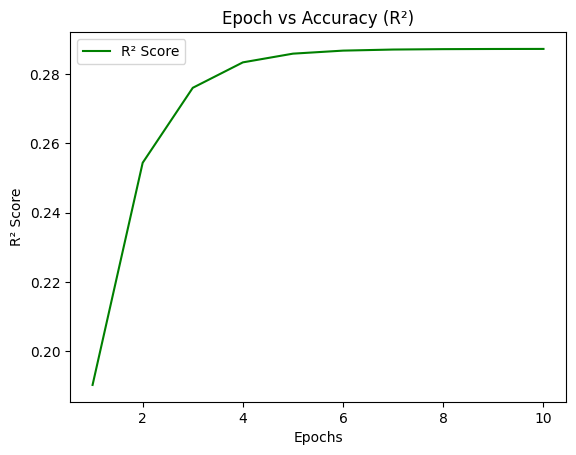

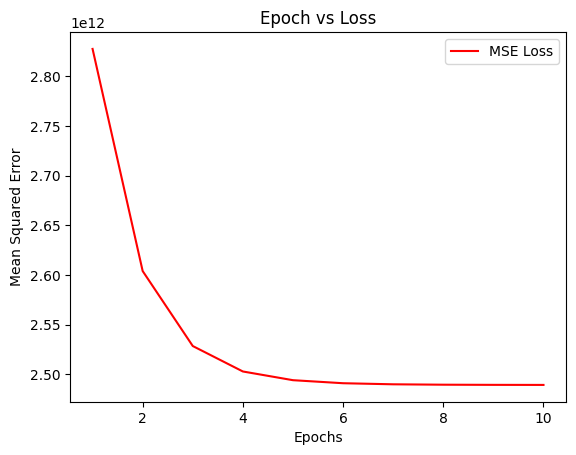

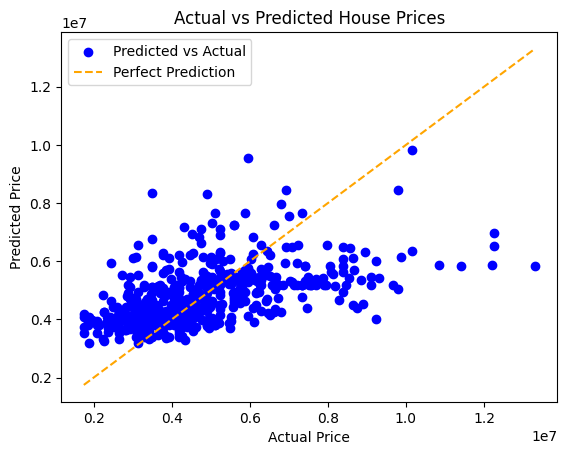

In [5]:
# R² Score
plt.plot(range(1, epochs+1), r2_scores, color="green", label="R² Score")     # Draw a green line showing R² score vs epoch number
plt.xlabel("Epochs")                                                        # Label the x-axis as "Epochs" (training rounds)
plt.ylabel("R² Score")                                                    # Label the y-axis as "R² Score" (accuracy of model)
plt.title("Epoch vs Accuracy (R²)")                                     # Give the plot a title
plt.legend()                                                           # Show the label "R² Score" on the plot
plt.show()                                                           # Display the plot

# MSE Loss
plt.plot(range(1, epochs+1), mse_losses, color="red", label="MSE Loss")   # Draw a red line showing MSE error vs epoch number
plt.xlabel("Epochs")                                                       # Label x-axis as "Epochs"
plt.ylabel("Mean Squared Error")                                           #  Label y-axis as "MSE" (how wrong predictions are)
plt.title("Epoch vs Loss")                                                # Give this plot a title
plt.legend()                                                              # Show the label "MSE Loss" on the plot
plt.show()                                                                # Display the MSE plot



# Actual vs Predicted Prices
plt.scatter(y, y_pred, color="blue", label="Predicted vs Actual")  # Plot each house: actual price on x-axis, predicted price on y-axis
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="orange", linestyle="--", label="Perfect Prediction")  # Draw a diagonal line: the linear line
plt.xlabel("Actual Price")  # Label x-axis as actual price
plt.ylabel("Predicted Price")  # Label y-axis as predicted price
plt.title("Actual vs Predicted House Prices")  # Title of the plot
plt.legend()  # Show labels
plt.show()  # Display the plot
